<a href="https://colab.research.google.com/github/Bhavesh-13/1BM21AI031-Bhavesh/blob/main/IML_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

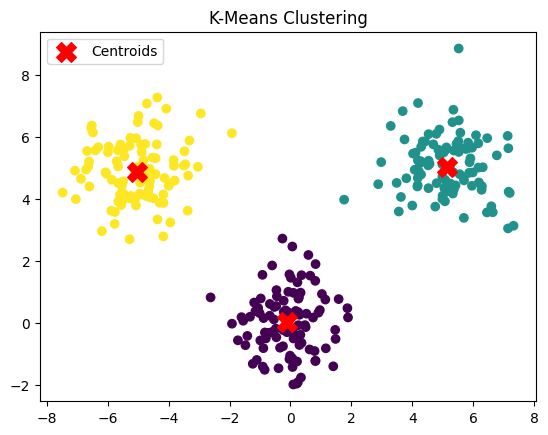

In [9]:
# K MEANS
import numpy as np
import matplotlib.pyplot as plt

def k_means(data, k, max_iters=100, tol=1e-4):
    # Initialize centroids randomly
    centroids = data[np.random.choice(len(data), k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(data - centroids[:, np.newaxis], axis=2), axis=0)

        # Update centroids based on the mean of assigned data points
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels

# Generate random data for testing
np.random.seed(42)
data = np.concatenate([np.random.normal(loc=(0, 0), scale=1, size=(100, 2)),
                       np.random.normal(loc=(5, 5), scale=1, size=(100, 2)),
                       np.random.normal(loc=(-5, 5), scale=1, size=(100, 2))])

# Perform k-means clustering with k=3
k = 3
centroids, labels = k_means(data, k)

# Plot the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [10]:
# EM
import numpy as np
from scipy.stats import norm

def initialize_parameters(data, k):
    # Randomly initialize means and equal weights; set standard deviation to the standard deviation of the data
    means = np.random.choice(data, k, replace=False)
    weights = np.ones(k) / k
    std_dev = np.std(data)
    covariances = [std_dev**2] * k
    return means, covariances, weights

def expectation_step(data, means, covariances, weights):
    responsibilities = np.array([weights[i] * norm.pdf(data, means[i], np.sqrt(covariances[i])) for i in range(len(means))])
    return responsibilities / np.sum(responsibilities, axis=0)

def maximization_step(data, responsibilities):
    Nk = np.sum(responsibilities, axis=1)
    means = np.sum(responsibilities * data, axis=1) / Nk
    covariances = np.sum(responsibilities * (data - means[:, np.newaxis])**2, axis=1) / Nk
    weights = Nk / len(data)
    return means, covariances, weights

def log_likelihood(data, means, covariances, weights):
    likelihoods = np.array([weights[i] * norm.pdf(data, means[i], np.sqrt(covariances[i])) for i in range(len(means))])
    return np.sum(np.log(np.sum(likelihoods, axis=0)))

def gmm_em(data, k, max_iters=100, tol=1e-4):
    means, covariances, weights = initialize_parameters(data, k)

    for _ in range(max_iters):
        responsibilities = expectation_step(data, means, covariances, weights)
        means, covariances, weights = maximization_step(data, responsibilities)

        # Check for convergence
        likelihood_prev = log_likelihood(data, means, covariances, weights)
        responsibilities = expectation_step(data, means, covariances, weights)
        likelihood_current = log_likelihood(data, means, covariances, weights)

        if likelihood_current - likelihood_prev < tol:
            break

    return means, covariances, weights

# Example usage with synthetic univariate data
np.random.seed(42)
data = np.concatenate([np.random.normal(loc=0, scale=1, size=100),
                       np.random.normal(loc=5, scale=1, size=100),
                       np.random.normal(loc=-5, scale=1, size=100)])

# Perform GMM-EM with k=3
k = 3
means, covariances, weights = gmm_em(data, k)

print("Estimated means:", means)
print("Estimated covariances:", covariances)
print("Estimated weights:", weights)


Estimated means: [-1.70744144 -2.76566626  2.34338675]
Estimated covariances: [13.37334266 10.76547651 12.2710925 ]
Estimated weights: [0.28739316 0.23189327 0.48071357]


In [11]:
# NAIVE BAYES
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
# Apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

def load_data():
    # Sample transactions for demonstration
    return [
        ['bread', 'milk'],
        ['bread', 'diaper', 'beer', 'egg'],
        ['milk', 'diaper', 'beer', 'cola'],
        ['bread', 'milk', 'diaper', 'beer'],
        ['bread', 'milk', 'diaper', 'cola']
    ]

# Convert the transaction data into a one-hot encoded DataFrame
def transform_data(transactions):
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    return df

def main():
    transactions = load_data()

    # Convert transactions to one-hot encoded format
    df = transform_data(transactions)

    # Apply the Apriori algorithm
    frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

    # Print frequent itemsets
    print("Frequent Itemsets:")
    print(frequent_itemsets)

    # Generate association rules
    from mlxtend.frequent_patterns import association_rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

    # Print association rules
    print("\nAssociation Rules:")
    print(rules[['antecedents', 'consequents', 'confidence']])

if __name__ == "__main__":
    main()


Frequent Itemsets:
    support                     itemsets
0       0.6                       (beer)
1       0.8                      (bread)
2       0.4                       (cola)
3       0.8                     (diaper)
4       0.2                        (egg)
5       0.8                       (milk)
6       0.4                (bread, beer)
7       0.2                 (cola, beer)
8       0.6               (beer, diaper)
9       0.2                  (beer, egg)
10      0.4                 (milk, beer)
11      0.2                (cola, bread)
12      0.6              (bread, diaper)
13      0.2                 (bread, egg)
14      0.6                (milk, bread)
15      0.4               (cola, diaper)
16      0.4                 (cola, milk)
17      0.2                (diaper, egg)
18      0.6               (milk, diaper)
19      0.4        (bread, beer, diaper)
20      0.2           (bread, beer, egg)
21      0.2          (milk, bread, beer)
22      0.2         (cola, beer, diape